## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap SVC discovery scan (polite)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [4]:
directory = '/home/USER/notebooks/pcaps/nmap_svc_discovery_polite'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [5]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    400.184877
Name: time, dtype: float64

In [6]:
duration_list = []
#print(len(merged))
for t in scan_list:
#    t['time'] = pd.to_datetime(t['time'], unit='s')
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [7]:
scan_times
#duration_list

0    400.184877
1    400.198093
2    400.159393
3    400.175626
4    400.197276
5    400.175418
6    400.155755
7    400.145313
8    400.154235
9    400.168510
Name: Scan times, dtype: float64

In [8]:
temp = pd.DataFrame(duration_list)

In [9]:
temp.mean()

0    400.17145
dtype: float64

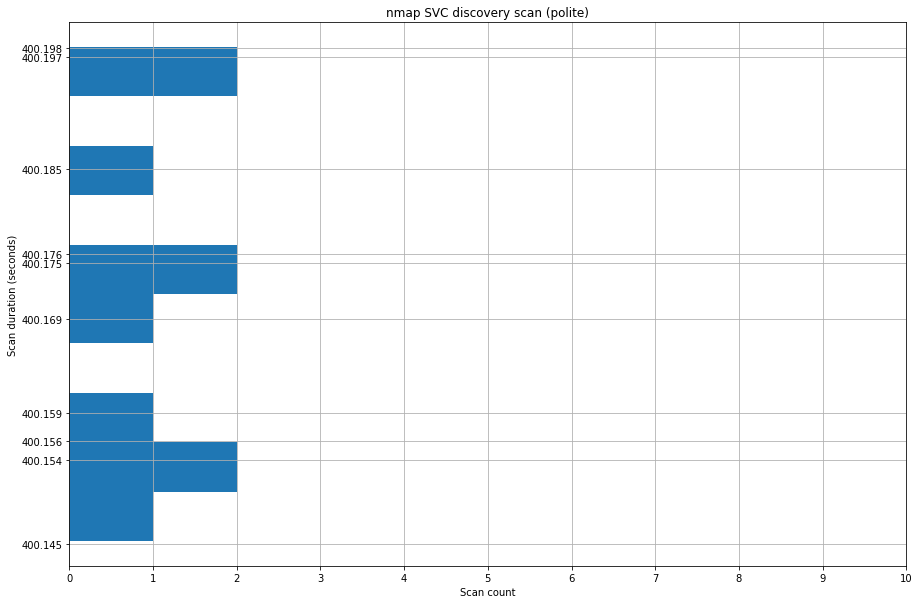

In [10]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [11]:
temp.describe()

,0
count,10.000000
mean,400.171450
std,0.018166
min,400.145313
25%,400.156664
50%,400.171964
75%,400.182564
max,400.198093


## Packet count

In [12]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [13]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [14]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 49.978577989229144



## Order of ports scanned


In [15]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 49213 256
2 49213 80
3 49213 143
4 49213 1720
5 49213 53
6 49213 110
7 49213 22
8 49213 5900
9 49213 21
10 49213 445
11 49213 1723
12 49213 993
13 49213 113
14 49213 587
15 49213 3306
16 49213 1025
17 49213 443
18 49213 554
19 49213 111
20 49213 995
21 49213 199
22 49213 25
23 49213 139
24 49213 8888
25 49213 135
26 49213 3389
27 49213 8080
28 49213 23
29 49213 1719
30 49213 211
31 49213 9575
32 49213 3077
33 49213 4125
34 49213 9998
35 49213 6025
36 49213 3128
37 49213 1301
38 49213 3001
39 49213 24
40 49213 3404
41 49213 1110
42 49213 8099
43 49213 6668
44 49213 7002
45 49213 1234
46 49213 16992
47 49213 9595
48 49213 3260
49 49213 3889
50 49213 1041
51 49213 2106
52 49213 3880
53 49213 8800
54 49213 7999
55 49213 4443
56 49213 3737
57 49213 5560
58 49213 9876
59 49213 9
60 49213 9503
61 49213 2041
62 49213 146
63 49213 340
64 49213 8254
65 49213 8222
66 49213 5000
67 49213 15000
68 49213 5810
69 49213 8649
70 49213 8290
71 49213 1521
72 49213 11110
73 49213 5190
74 49213 56738
75 

609 49213 10243
610 49213 10215
611 49213 5002
612 49213 990
613 49213 10082
614 49213 1124
615 49213 259
616 49213 54045
617 49213 1071
618 49213 1042
619 49213 50000
620 49213 3300
621 49213 2000
622 49213 3690
623 49213 50001
624 49213 17988
625 49213 5510
626 49213 163
627 49213 6156
628 49213 1114
629 49213 88
630 49213 49167
631 49213 5357
632 49213 912
633 49213 497
634 49213 19350
635 49213 2920
636 49213 18988
637 49213 407
638 49213 32779
639 49213 6565
640 49213 5120
641 49213 6006
642 49213 1236
643 49213 2393
644 49213 1089
645 49213 1073
646 49213 8181
647 49213 49155
648 49213 514
649 49213 541
650 49213 52822
651 49213 1863
652 49213 6123
653 49213 4445
654 49213 427
655 49213 1839
656 49213 8081
657 49213 61532
658 49213 1102
659 49213 26
660 49213 20828
661 49213 4567
662 49213 687
663 49213 7937
664 49213 1935
665 49213 2008
666 49213 1165
667 49213 5631
668 49213 8994
669 49213 1163
670 49213 42
671 49213 5009
672 49213 5906
673 49213 8002
674 49213 2043
675 49213 2

244 40632 16012
245 40632 5566
246 40632 19315
247 40632 2099
248 40632 7676
249 40632 3211
250 40632 32780
251 40632 1719
252 40632 1138
253 40632 3128
254 40632 444
255 40632 2323
256 40632 2967
257 40632 6789
258 40632 1328
259 40632 5100
260 40632 8002
261 40632 119
262 40632 2910
263 40632 1271
264 40632 1066
265 40632 6003
266 40632 1165
267 40632 5190
268 40632 1082
269 40632 8292
270 40632 5961
271 40632 5825
272 40632 2811
273 40632 49
274 40632 4125
275 40632 1352
276 40632 4002
277 40632 1301
278 40632 6502
279 40632 5679
280 40632 7000
281 40632 6669
282 40632 1061
283 40632 1110
284 40632 144
285 40632 3300
286 40632 3517
287 40632 90
288 40632 5225
289 40632 1108
290 40632 10629
291 40632 1038
292 40632 1043
293 40632 7200
294 40632 1984
295 40632 2401
296 40632 1058
297 40632 666
298 40632 2045
299 40632 5051
300 40632 5120
301 40632 64680
302 40632 9071
303 40632 50636
304 40632 6881
305 40632 33
306 40632 1034
307 40632 8654
308 40632 8082
309 40632 7106
310 40632 2144

275 43014 1272
276 43014 500
277 43014 1147
278 43014 4444
279 43014 4006
280 43014 9081
281 43014 9878
282 43014 50006
283 43014 1065
284 43014 119
285 43014 9103
286 43014 24444
287 43014 2126
288 43014 5226
289 43014 9968
290 43014 3007
291 43014 5960
292 43014 1029
293 43014 5560
294 43014 49157
295 43014 2522
296 43014 3370
297 43014 2492
298 43014 9091
299 43014 2170
300 43014 667
301 43014 1287
302 43014 1875
303 43014 9100
304 43014 7004
305 43014 1334
306 43014 2135
307 43014 2717
308 43014 1169
309 43014 44176
310 43014 5050
311 43014 7200
312 43014 163
313 43014 5666
314 43014 8042
315 43014 7443
316 43014 2111
317 43014 3880
318 43014 1455
319 43014 2100
320 43014 2144
321 43014 10009
322 43014 3784
323 43014 9010
324 43014 714
325 43014 146
326 43014 8009
327 43014 7676
328 43014 6059
329 43014 5000
330 43014 1046
331 43014 8085
332 43014 34571
333 43014 3003
334 43014 5087
335 43014 9900
336 43014 18101
337 43014 42
338 43014 1812
339 43014 888
340 43014 1935
341 43014 50

859 43014 32768
860 43014 3017
861 43014 90
862 43014 3030
863 43014 2366
864 43014 3828
865 43014 3013
866 43014 41511
867 43014 1864
868 43014 6667
869 43014 7496
870 43014 545
871 43014 30
872 43014 1117
873 43014 7999
874 43014 787
875 43014 5802
876 43014 1036
877 43014 5922
878 43014 11110
879 43014 10616
880 43014 7100
881 43014 1500
882 43014 1073
883 43014 33
884 43014 15004
885 43014 49165
886 43014 6112
887 43014 6668
888 43014 6004
889 43014 1801
890 43014 6123
891 43014 5500
892 43014 3268
893 43014 2034
894 43014 22939
895 43014 11967
896 43014 4900
897 43014 1062
898 43014 3889
899 43014 5009
900 43014 37
901 43014 3920
902 43014 280
903 43014 1165
904 43014 1719
905 43014 2121
906 43014 5877
907 43014 1000
908 43014 3001
909 43014 16113
910 43014 2909
911 43014 1248
912 43014 1007
913 43014 6580
914 43014 7106
915 43014 902
916 43014 1106
917 43014 3351
918 43014 3323
919 43014 16080
920 43014 9618
921 43014 27355
922 43014 1039
923 43014 10778
924 43014 1310
925 43014 

441 49226 1124
442 49226 1065
443 49226 1900
444 49226 593
445 49226 51493
446 49226 465
447 49226 7911
448 49226 5432
449 49226 2003
450 49226 2323
451 49226 4129
452 49226 5922
453 49226 888
454 49226 1070
455 49226 161
456 49226 3369
457 49226 264
458 49226 9593
459 49226 4848
460 49226 6007
461 49226 32770
462 49226 990
463 49226 1034
464 49226 58080
465 49226 10243
466 49226 7004
467 49226 48080
468 49226 1782
469 49226 1840
470 49226 2007
471 49226 3737
472 49226 6025
473 49226 32774
474 49226 1149
475 49226 2638
476 49226 1999
477 49226 4005
478 49226 9485
479 49226 2013
480 49226 1060
481 49226 880
482 49226 2121
483 49226 8873
484 49226 389
485 49226 8800
486 49226 32771
487 49226 49400
488 49226 4449
489 49226 1721
490 49226 2910
491 49226 9200
492 49226 2200
493 49226 1998
494 49226 514
495 49226 1862
496 49226 631
497 49226 50636
498 49226 3784
499 49226 1443
500 49226 1666
501 49226 6112
502 49226 2190
503 49226 10215
504 49226 5102
505 49226 3800
506 49226 1688
507 49226 

107 51005 32775
108 51005 1310
109 51005 17
110 51005 1090
111 51005 9071
112 51005 1041
113 51005 5510
114 51005 9575
115 51005 1271
116 51005 1060
117 51005 41511
118 51005 7496
119 51005 49
120 51005 1031
121 51005 6006
122 51005 9418
123 51005 2196
124 51005 27356
125 51005 3077
126 51005 2492
127 51005 5003
128 51005 6839
129 51005 3476
130 51005 4129
131 51005 11967
132 51005 2021
133 51005 5631
134 51005 888
135 51005 1095
136 51005 8254
137 51005 13782
138 51005 5800
139 51005 8873
140 51005 10025
141 51005 6969
142 51005 5544
143 51005 6005
144 51005 6788
145 51005 8086
146 51005 1658
147 51005 1503
148 51005 9103
149 51005 726
150 51005 7103
151 51005 64680
152 51005 6567
153 51005 1029
154 51005 55555
155 51005 2002
156 51005 1085
157 51005 2920
158 51005 1047
159 51005 32769
160 51005 1108
161 51005 9220
162 51005 1248
163 51005 3031
164 51005 648
165 51005 1059
166 51005 70
167 51005 668
168 51005 3580
169 51005 1038
170 51005 1052
171 51005 1236
172 51005 1107
173 51005 1

774 51005 1862
775 51005 3071
776 51005 5910
777 51005 1233
778 51005 465
779 51005 20222
780 51005 15004
781 51005 2522
782 51005 5100
783 51005 8701
784 51005 6389
785 51005 512
786 51005 2718
787 51005 1148
788 51005 1027
789 51005 1718
790 51005 44443
791 51005 8649
792 51005 10778
793 51005 5989
794 51005 1063
795 51005 5087
796 51005 3300
797 51005 55055
798 51005 8010
799 51005 3869
800 51005 7911
801 51005 7201
802 51005 425
803 51005 6346
804 51005 2099
805 51005 2020
806 51005 1089
807 51005 497
808 51005 1641
809 51005 1056
810 51005 8800
811 51005 14238
812 51005 32785
813 51005 3527
814 51005 873
815 51005 3889
816 51005 3367
817 51005 1259
818 51005 48080
819 51005 1247
820 51005 1075
821 51005 5922
822 51005 1097
823 51005 5214
824 51005 9091
825 51005 44442
826 51005 2998
827 51005 1073
828 51005 13456
829 51005 16993
830 51005 17877
831 51005 1066
832 51005 7627
833 51005 5269
834 51005 1024
835 51005 1000
836 51005 2126
837 51005 2006
838 51005 1091
839 51005 3323
840

440 37067 30
441 37067 3889
442 37067 8011
443 37067 1055
444 37067 1984
445 37067 3689
446 37067 9011
447 37067 4000
448 37067 88
449 37067 4125
450 37067 16113
451 37067 765
452 37067 5901
453 37067 6003
454 37067 70
455 37067 1061
456 37067 1042
457 37067 7019
458 37067 1533
459 37067 666
460 37067 4005
461 37067 16993
462 37067 1071
463 37067 3168
464 37067 9618
465 37067 5440
466 37067 119
467 37067 5800
468 37067 1900
469 37067 3827
470 37067 49161
471 37067 1052
472 37067 49167
473 37067 44442
474 37067 1311
475 37067 1300
476 37067 280
477 37067 389
478 37067 2251
479 37067 8031
480 37067 2725
481 37067 14441
482 37067 8010
483 37067 8292
484 37067 1034
485 37067 2401
486 37067 49175
487 37067 52822
488 37067 50500
489 37067 1049
490 37067 1935
491 37067 49999
492 37067 26214
493 37067 9944
494 37067 1812
495 37067 55056
496 37067 777
497 37067 1199
498 37067 40193
499 37067 2800
500 37067 5222
501 37067 3000
502 37067 55555
503 37067 8192
504 37067 3404
505 37067 2366
506 3706

107 53921 4445
108 53921 32782
109 53921 1059
110 53921 5431
111 53921 10003
112 53921 31038
113 53921 1783
114 53921 8081
115 53921 1081
116 53921 3914
117 53921 1056
118 53921 9003
119 53921 6667
120 53921 6009
121 53921 5822
122 53921 515
123 53921 1065
124 53921 49400
125 53921 2200
126 53921 6565
127 53921 1095
128 53921 60020
129 53921 3580
130 53921 992
131 53921 5102
132 53921 6106
133 53921 1099
134 53921 49158
135 53921 3690
136 53921 1521
137 53921 8085
138 53921 44176
139 53921 8007
140 53921 5009
141 53921 458
142 53921 9290
143 53921 2170
144 53921 5907
145 53921 726
146 53921 3871
147 53921 2383
148 53921 1141
149 53921 11110
150 53921 9080
151 53921 366
152 53921 9943
153 53921 625
154 53921 10010
155 53921 1971
156 53921 2121
157 53921 1076
158 53921 9111
159 53921 51493
160 53921 6003
161 53921 2602
162 53921 6792
163 53921 3546
164 53921 1154
165 53921 84
166 53921 22939
167 53921 2604
168 53921 9594
169 53921 3369
170 53921 9968
171 53921 9102
172 53921 2048
173 539

773 53921 9415
774 53921 7512
775 53921 9207
776 53921 1455
777 53921 49161
778 53921 1311
779 53921 6007
780 53921 7627
781 53921 1078
782 53921 10629
783 53921 8654
784 53921 2013
785 53921 1075
786 53921 8383
787 53921 20005
788 53921 32773
789 53921 1721
790 53921 4998
791 53921 82
792 53921 6788
793 53921 1031
794 53921 50002
795 53921 7025
796 53921 722
797 53921 2607
798 53921 33354
799 53921 1088
800 53921 5666
801 53921 2809
802 53921 5000
803 53921 1071
804 53921 3703
805 53921 32772
806 53921 1840
807 53921 7921
808 53921 5952
809 53921 49153
810 53921 8200
811 53921 8008
812 53921 9878
813 53921 45100
814 53921 32781
815 53921 5911
816 53921 306
817 53921 2100
818 53921 5280
819 53921 10778
820 53921 3889
821 53921 6901
822 53921 2007
823 53921 7001
824 53921 5633
825 53921 2702
826 53921 1073
827 53921 2998
828 53921 52822
829 53921 1093
830 53921 8254
831 53921 1045
832 53921 5802
833 53921 465
834 53921 27000
835 53921 1700
836 53921 541
837 53921 1085
838 53921 3052
839

440 41818 2968
441 41818 1259
442 41818 1102
443 41818 5679
444 41818 1862
445 41818 3077
446 41818 7200
447 41818 5009
448 41818 912
449 41818 2393
450 41818 1717
451 41818 9220
452 41818 6009
453 41818 5200
454 41818 5902
455 41818 8994
456 41818 7000
457 41818 541
458 41818 25735
459 41818 50002
460 41818 18040
461 41818 1068
462 41818 49152
463 41818 1093
464 41818 85
465 41818 8008
466 41818 5730
467 41818 5825
468 41818 8011
469 41818 1198
470 41818 1174
471 41818 32774
472 41818 31337
473 41818 5087
474 41818 51103
475 41818 6101
476 41818 3390
477 41818 2191
478 41818 8192
479 41818 3546
480 41818 1311
481 41818 5862
482 41818 2009
483 41818 1056
484 41818 911
485 41818 3300
486 41818 1033
487 41818 9575
488 41818 2909
489 41818 9876
490 41818 2718
491 41818 1059
492 41818 43
493 41818 1721
494 41818 32783
495 41818 9535
496 41818 41511
497 41818 5432
498 41818 10082
499 41818 8652
500 41818 2047
501 41818 8222
502 41818 2717
503 41818 8701
504 41818 19780
505 41818 1213
506 41

106 56230 3527
107 56230 2030
108 56230 1580
109 56230 64680
110 56230 43
111 56230 5903
112 56230 109
113 56230 16001
114 56230 1001
115 56230 5925
116 56230 7676
117 56230 1863
118 56230 683
119 56230 4005
120 56230 1145
121 56230 2045
122 56230 3071
123 56230 8042
124 56230 9080
125 56230 1500
126 56230 1174
127 56230 5963
128 56230 9595
129 56230 1296
130 56230 2033
131 56230 49176
132 56230 8181
133 56230 9099
134 56230 5550
135 56230 340
136 56230 33
137 56230 5060
138 56230 9898
139 56230 82
140 56230 34571
141 56230 6101
142 56230 1272
143 56230 7512
144 56230 144
145 56230 3703
146 56230 119
147 56230 3690
148 56230 787
149 56230 27352
150 56230 6666
151 56230 15003
152 56230 726
153 56230 992
154 56230 49999
155 56230 2043
156 56230 49167
157 56230 9917
158 56230 79
159 56230 8649
160 56230 3268
161 56230 10180
162 56230 5298
163 56230 44176
164 56230 5633
165 56230 9081
166 56230 3918
167 56230 1048
168 56230 7443
169 56230 16000
170 56230 2047
171 56230 21571
172 56230 5505

773 56230 3322
774 56230 3828
775 56230 7777
776 56230 212
777 56230 2393
778 56230 33899
779 56230 9485
780 56230 26
781 56230 1761
782 56230 2107
783 56230 16993
784 56230 5815
785 56230 3211
786 56230 62078
787 56230 593
788 56230 1443
789 56230 1095
790 56230 3221
791 56230 1036
792 56230 1233
793 56230 5051
794 56230 8000
795 56230 5998
796 56230 5003
797 56230 9878
798 56230 52848
799 56230 6689
800 56230 1717
801 56230 7200
802 56230 44442
803 56230 2119
804 56230 4443
805 56230 30951
806 56230 9500
807 56230 11111
808 56230 9100
809 56230 1805
810 56230 1088
811 56230 85
812 56230 1259
813 56230 4550
814 56230 5225
815 56230 3737
816 56230 5004
817 56230 1092
818 56230 9944
819 56230 52822
820 56230 16113
821 56230 51103
822 56230 2042
823 56230 37
824 56230 2009
825 56230 125
826 56230 1073
827 56230 32
828 56230 427
829 56230 26214
830 56230 7911
831 56230 1247
832 56230 1234
833 56230 3372
834 56230 2608
835 56230 44501
836 56230 9999
837 56230 1984
838 56230 9102
839 56230 

439 59038 1287
440 59038 5998
441 59038 515
442 59038 34571
443 59038 691
444 59038 9877
445 59038 8402
446 59038 2910
447 59038 1277
448 59038 7443
449 59038 3052
450 59038 2394
451 59038 1433
452 59038 106
453 59038 2042
454 59038 5730
455 59038 50003
456 59038 389
457 59038 3370
458 59038 843
459 59038 10621
460 59038 3283
461 59038 5080
462 59038 49
463 59038 49160
464 59038 2105
465 59038 3880
466 59038 30718
467 59038 7402
468 59038 8045
469 59038 3000
470 59038 4900
471 59038 5922
472 59038 705
473 59038 5999
474 59038 10628
475 59038 7002
476 59038 2500
477 59038 8084
478 59038 1029
479 59038 3995
480 59038 541
481 59038 3030
482 59038 1721
483 59038 7778
484 59038 1022
485 59038 1213
486 59038 1069
487 59038 636
488 59038 2323
489 59038 9099
490 59038 1166
491 59038 1081
492 59038 8011
493 59038 1199
494 59038 1247
495 59038 64623
496 59038 7741
497 59038 48080
498 59038 9503
499 59038 711
500 59038 1152
501 59038 65129
502 59038 1862
503 59038 808
504 59038 2968
505 59038 113

In [16]:
orders_port

,scannr,sport,dport
0,1,49213,256
1,2,49213,80
2,3,49213,143
3,4,49213,1720
4,5,49213,53
...,...,...,...
9995,996,59038,1583
9996,997,59038,3077
9997,998,59038,8899
9998,999,59038,63331


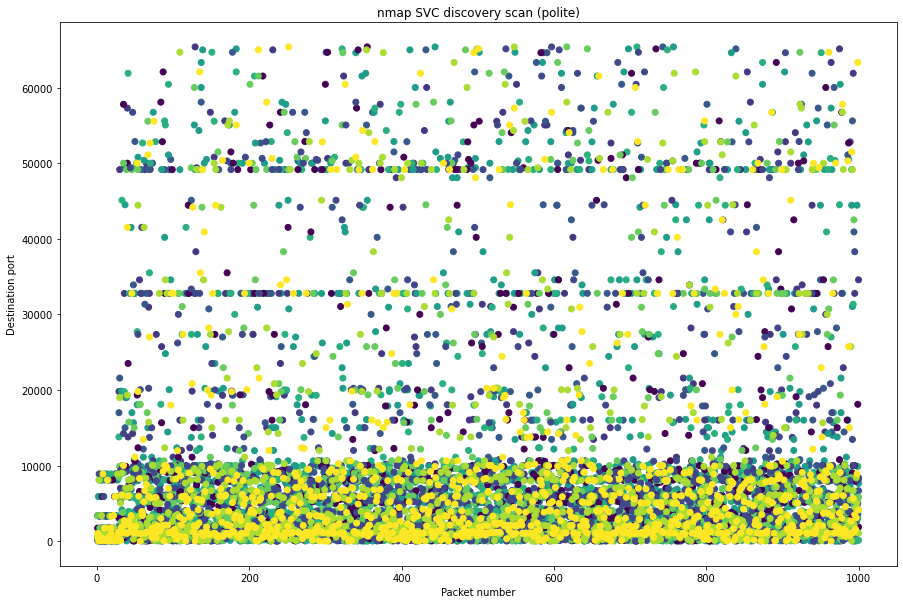

In [17]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [18]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [19]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

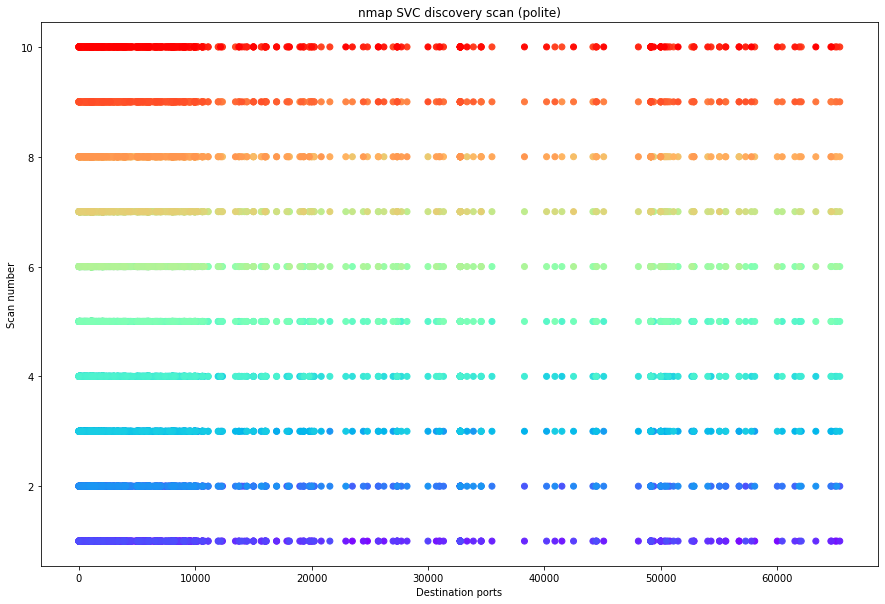

In [20]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [21]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

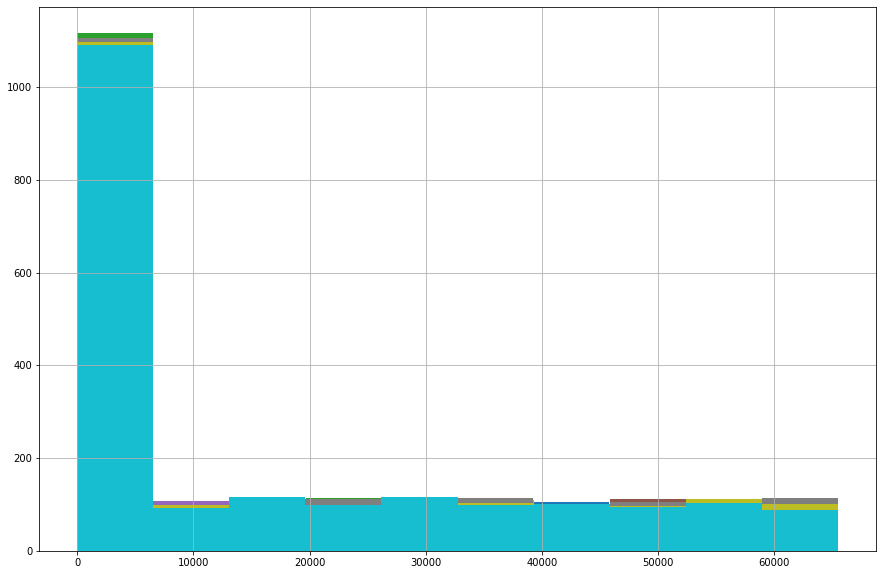

In [22]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

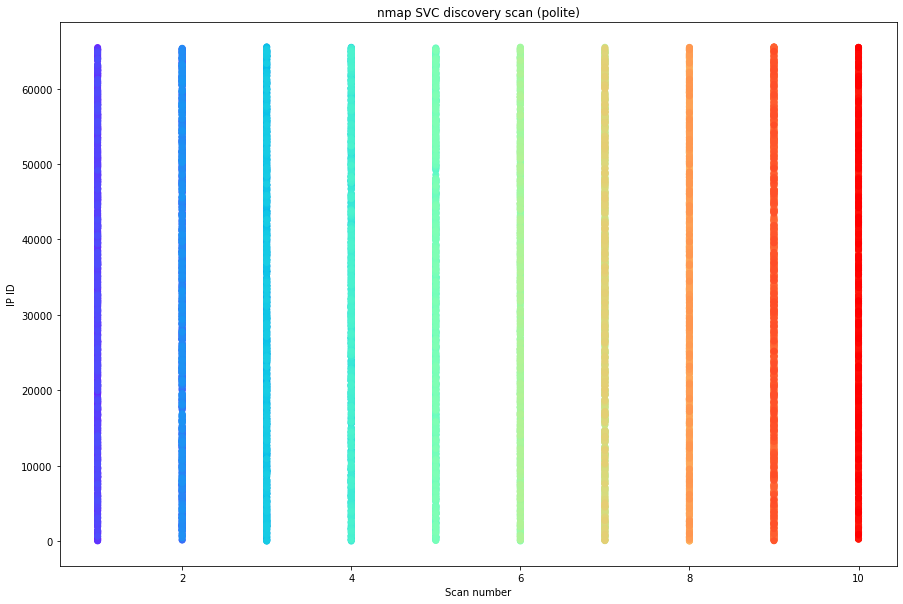

In [23]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


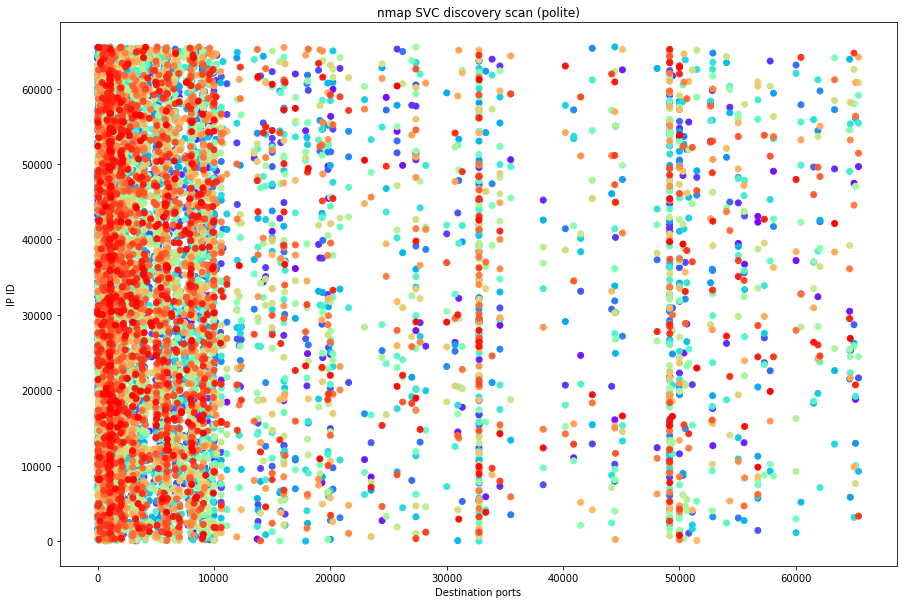

In [24]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])
            
if dst_ports:
    x = dst_ports
    ys = ip_ids

    colors = cm.rainbow(np.linspace(0, 1, len(ys)))

    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

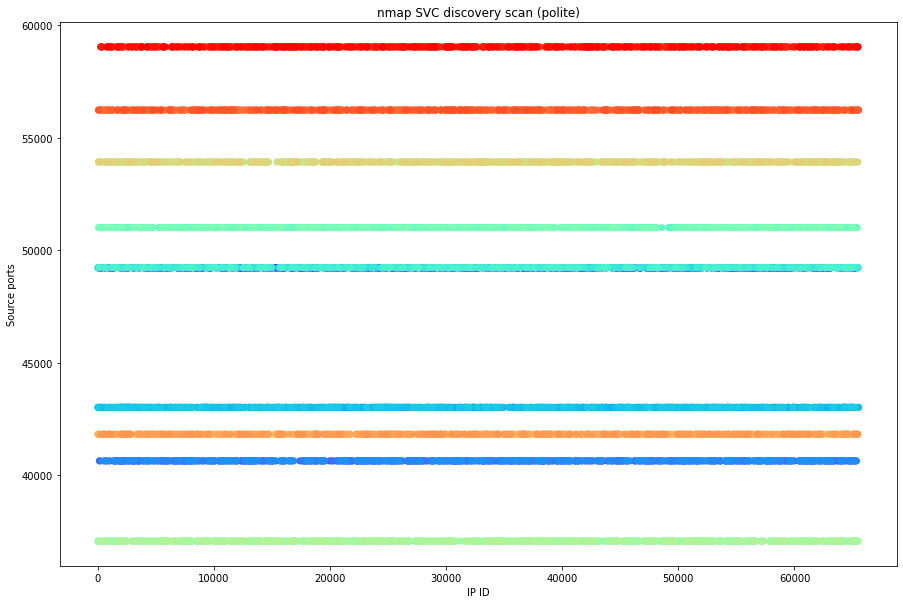

In [25]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

## TCP Window size

In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
-----
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Wind

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
Sequence number: 464554433
S

Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 319

Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 3199657278
Sequence number: 319

Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 3094557160
Sequence number: 309

Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 3196359084
Sequence number: 319

Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 414

Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 4143637796
Sequence number: 414

Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 3681874204
Sequence number: 368

Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 3006404421
Sequence number: 300

Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 194

Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 1949154022
Sequence number: 194

Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
Sequence number: 854774518
S

Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 3746973248
Sequence number: 374

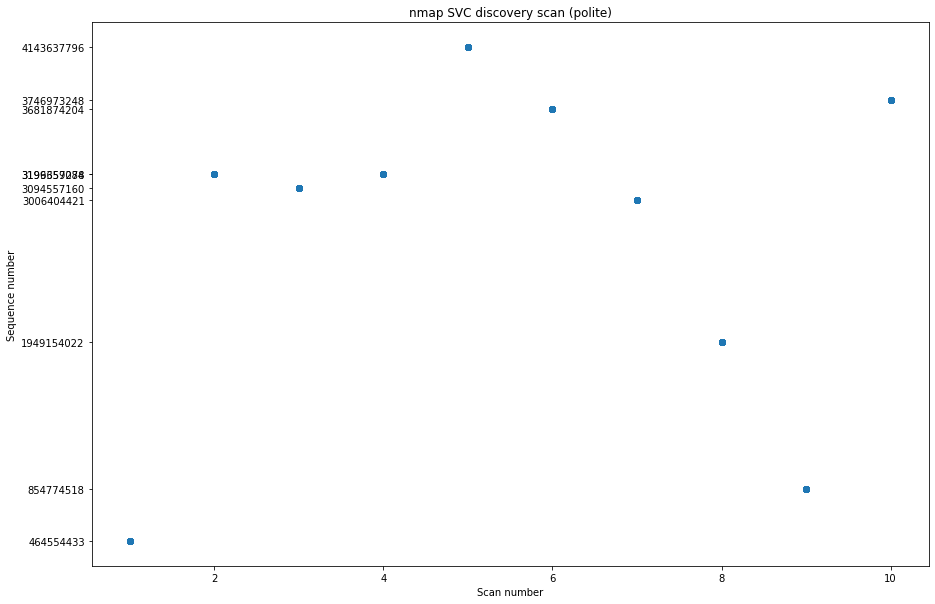

In [29]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


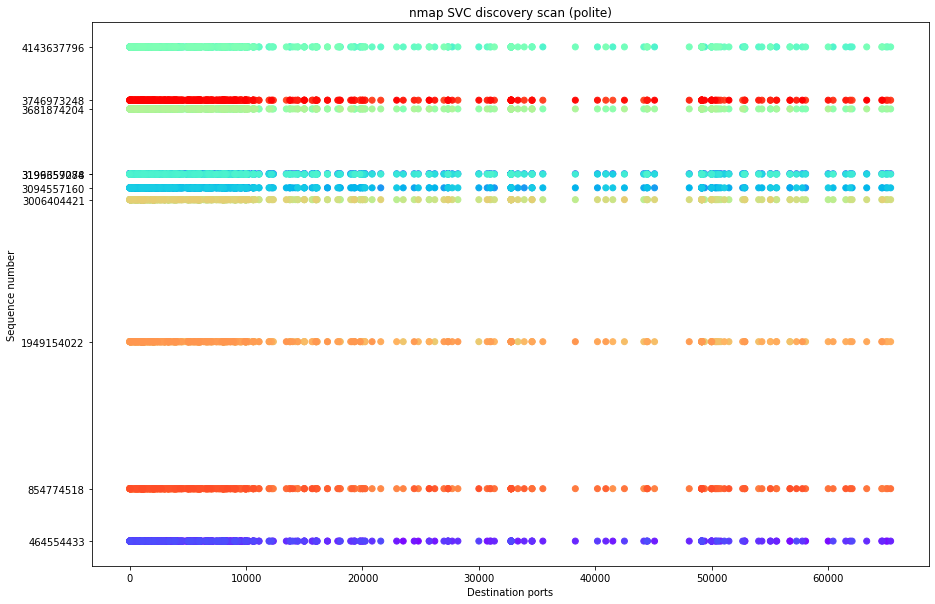

In [30]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

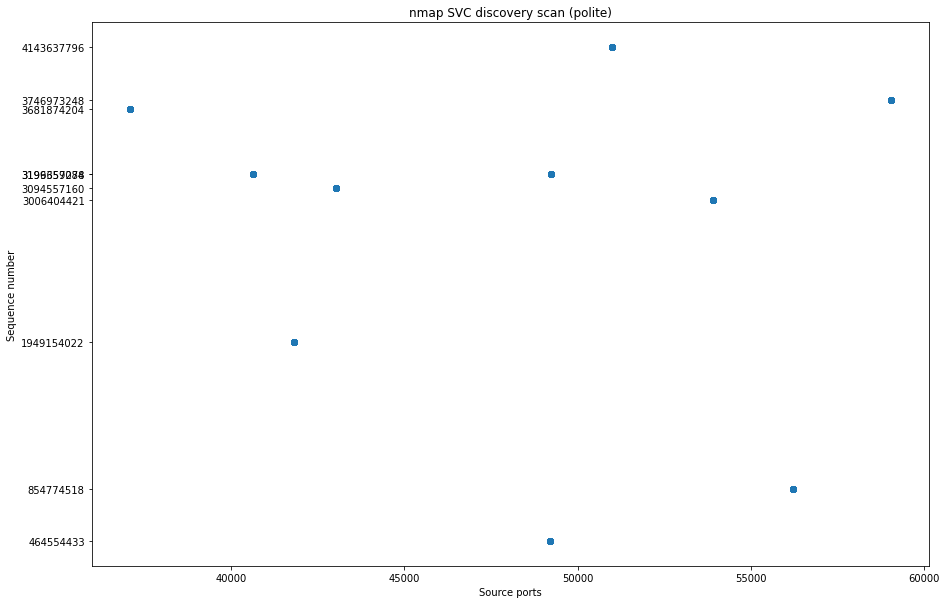

In [31]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [32]:
len(set(orders_port['sport']))

10

## Flags

In [33]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F